In [44]:
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
import random

# Task 1

# 1.1

In [5]:
mean = [3, 5]
cov = [[12, 3], 
         [3, 1]]

X = np.random.multivariate_normal(mean, cov, 1000)

array([[4.71535262, 6.20427392],
       [2.7671193 , 5.06414122],
       [8.67652755, 5.79598735],
       ...,
       [6.06845758, 6.17782517],
       [2.51954077, 4.2210364 ],
       [7.35003275, 6.52273661]])

# 1.2/1.3

In [69]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
S = np.cov(X_std.T)
print(np.mean(X_std,axis=0))
print(np.var(X_std,axis=0))

[ 1.59916524e-15 -8.87379059e-15]
[1. 1.]


# 1.4/1.5
wektory własne - wektory nie zmieniające kierunku względem danego endomorfizmu. Wartości własne oceniają skale podobieństwa tych wektorów własnych

In [14]:
eigval,eigvec = np.linalg.eig(S)
order = eigval.argsort()[::-1]
eigval = eigval[order]


[0.14171978 1.86028222]
[1.86028222 0.14171978]


In [16]:
Y = np.dot(X_std,np.dot(eigvec,np.diag(1/np.sqrt(eigval))))
Y

array([[ 0.3867472 , -3.38538029],
       [ 0.08343397, -0.1030227 ],
       [-0.44243744, -4.82060225],
       ...,
       [ 0.16344095, -4.09279303],
       [-0.32539244,  1.65564342],
       [ 0.14813908, -5.47365034]])

In [21]:
def plot_data(title,data,lean):
    plt.figure()
    plt.title(title)
    plt.scatter(x=data[:,0], y=data[:,1], s=10)
    

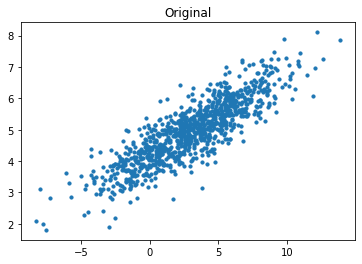

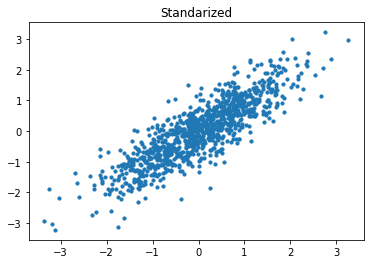

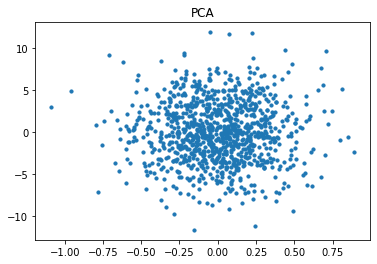

In [23]:
plot_data('Original',X,False)
plot_data('Standarized',X_std,False)
plot_data('PCA',Y,False)

# 1.6

In [30]:
def print_s(title,data):
    print(f'{title} Mean: {np.mean(data,axis=0)} \n Cov : { np.cov(data.T)} \n Cor : {np.corrcoef(data.T)}\n')

In [31]:
print_s('oriignal',X)
print_s('STD',X_std)
print_s('PCA',Y)

oriignal Mean: [2.94491686 4.95866854] 
 Cov : [[11.24692612  2.81572031]
 [ 2.81572031  0.95662906]] 
 Cor : [[1.         0.85842194]
 [0.85842194 1.        ]]

STD Mean: [ 1.59916524e-15 -8.87379059e-15] 
 Cov : [[1.001001   0.85928122]
 [0.85928122 1.001001  ]] 
 Cor : [[1.         0.85842194]
 [0.85842194 1.        ]]

PCA Mean: [-5.44703171e-15  1.36068934e-14] 
 Cov : [[7.61818731e-02 2.82723461e-16]
 [2.82723461e-16 1.31264822e+01]] 
 Cor : [[1.00000000e+00 2.82723461e-16]
 [2.82723461e-16 1.00000000e+00]]



# 1.7/1.8

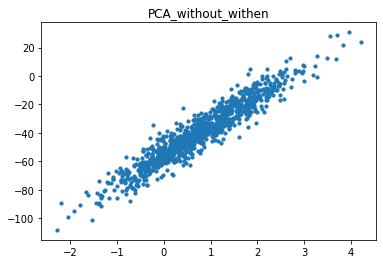

In [32]:
pca_wo_withen = np.dot(X,np.dot(eigvec,np.diag(1/eigval)))
plot_data('PCA_without_withen',pca_wo_withen,False)

In [33]:
print_s('PCA_without_withe',pca_wo_withen)

PCA_without_withe Mean: [  0.76544164 -39.43471175] 
 Cov : [[  0.94954917  19.51590073]
 [ 19.51590073 443.99906217]] 
 Cor : [[1.         0.95047094]
 [0.95047094 1.        ]]



# 1.9

In [41]:
means = [[-21,-2],[3,5],[27,12]]
cov = [[12,3],[3,1]]

Xi = np.array([np.random.multivariate_normal(means[random.randint(0,2)],cov) for _ in range(1000)])
Xi_std = (Xi - Xi.mean(axis=0)) / Xi.std(axis=0)
 
S_2 = np.cov(Xi_std.T)

eigval_i,eigvec_i = np.linalg.eig(S_2)
order = eigval_i.argsort()[::-1]
eigval_i = eigval_i[order]

print(eigval_i)
print(eigvec_i)

Xi_pca = np.dot(Xi_std, np.dot(eigvec_i, np.diag(1/np.sqrt(eigval_i))))

Xi_pca

[1.99805217 0.00394983]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


array([[ 0.18387973, -0.11057603],
       [ 1.35663459,  0.14413345],
       [-0.16114311,  0.9725843 ],
       ...,
       [-1.0005092 , -0.2091559 ],
       [ 1.31307754, -1.03834067],
       [-0.29363676, -0.65601855]])

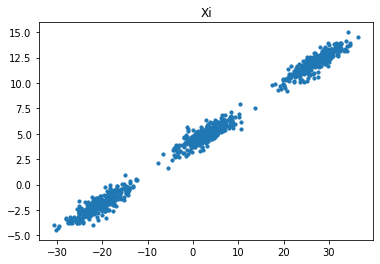

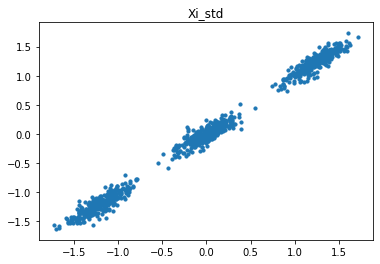

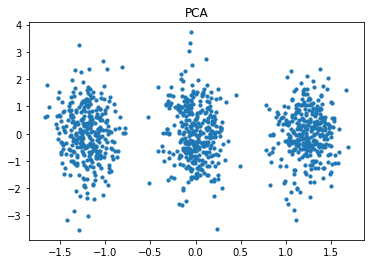

In [42]:
plot_data('Xi',Xi,False)
plot_data('Xi_std',Xi_std,False)
plot_data('PCA',Xi_pca,False)

# 1.10

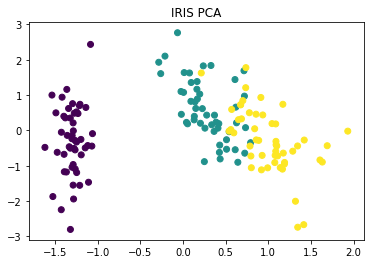

In [50]:
data_iris = datasets.load_iris()['data']
targets = datasets.load_iris()['target']

data_iris_std = (data_iris - np.mean(data_iris,axis=0)) / np.std(data_iris, axis=0)

S_iris = np.cov(data_iris_std.T)

eigval_iris,eigvec_iris = np.linalg.eig(S_iris)
eigval_iris = eigval_iris[eigval_iris.argsort()[::-1]]

data_iris_pca = np.dot(data_iris_std, np.dot(eigvec_iris, np.diag(1 / np.sqrt(eigval_iris))))

plt.title('IRIS PCA')
plt.scatter(data_iris_pca[:,0], data_iris_pca[:,1],c=targets)

# 1.11

In [59]:
reconstruction = np.zeros(data_iris.shape)
reconstruction[:,:2] += data_iris_pca[:, :2]

In [60]:
reconstruction = np.dot(reconstruction,eigvec_iris) + np.mean(data_iris,axis=0)

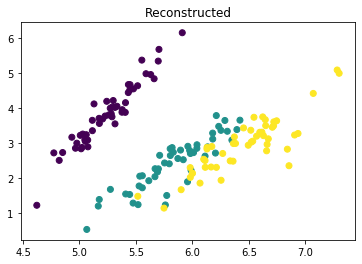

In [62]:
plt.title('Reconstructed')
plt.scatter(reconstruction[:,0],reconstruction[:,1],c=targets)

# 1.12

In [67]:
print(f'{np.mean((data_iris-reconstruction)**2)}')
print(f' Sum of eigenvalues: {np.sum(eigval_iris)}')

1.7196556676036174
 Sum of eigenvalues: 4.026845637583896
